In [1]:
import bt

In [2]:
%matplotlib inline

In [30]:
# fetch some data
data = bt.get('aapl, goog', start='2020-01-01')
print(data.head())

                 aapl       goog
Date                            
2020-01-02  73.785927  68.368500
2020-01-03  73.068573  68.032997
2020-01-06  73.650803  69.710503
2020-01-07  73.304405  69.667000
2020-01-08  74.483604  70.216003


In [31]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [32]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

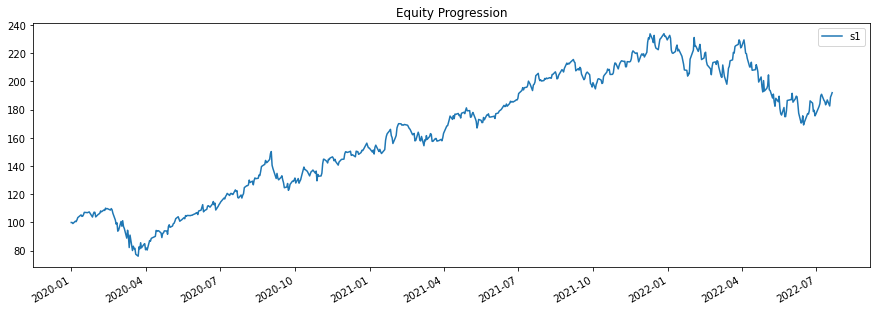

In [33]:
# first let's see an equity curve
res.plot();

In [34]:
# some stats
res.display()

Stat                 s1
-------------------  ----------
Start                2020-01-01
End                  2022-07-21
Risk-free rate       0.00%

Total Return         91.99%
Daily Sharpe         0.95
Daily Sortino        1.53
CAGR                 29.13%
Max Drawdown         -30.92%
Calmar Ratio         0.94

MTD                  9.35%
3m                   -7.14%
6m                   -7.74%
YTD                  -16.30%
1Y                   -3.03%
3Y (ann.)            29.13%
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  29.13%

Daily Sharpe         0.95
Daily Sortino        1.53
Daily Mean (ann.)    30.87%
Daily Vol (ann.)     32.51%
Daily Skew           -0.25
Daily Kurt           4.42
Best Day             10.71%
Worst Day            -12.01%

Monthly Sharpe       1.04
Monthly Sortino      2.08
Monthly Mean (ann.)  28.33%
Monthly Vol (ann.)   27.11%
Monthly Skew         -0.31
Monthly Kurt         -0.64
Best Month           15.98%
Worst Month          -13.68%

Yearly

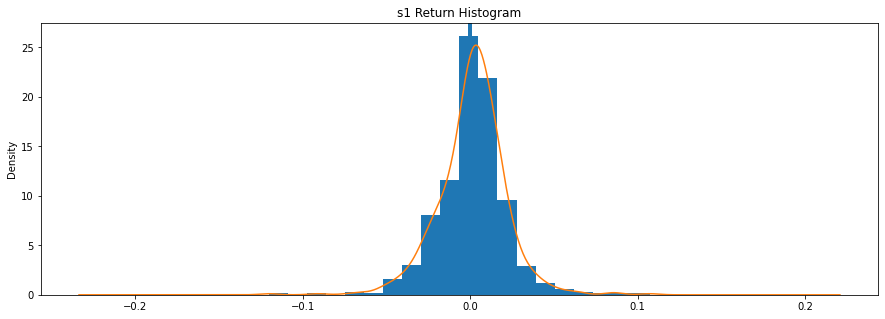

In [35]:
res.plot_histogram()

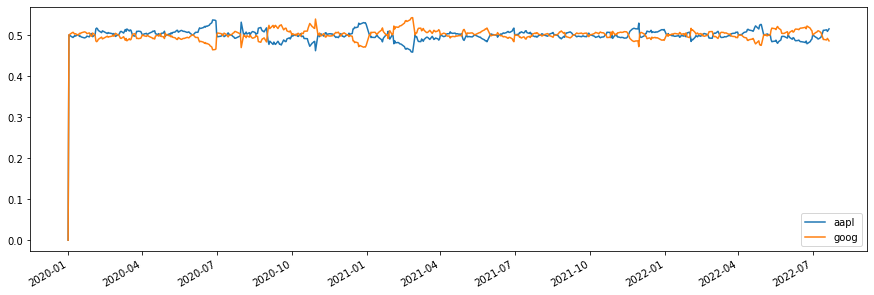

In [36]:
# plotting security weights over time
res.plot_security_weights()

In [38]:
# create new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])



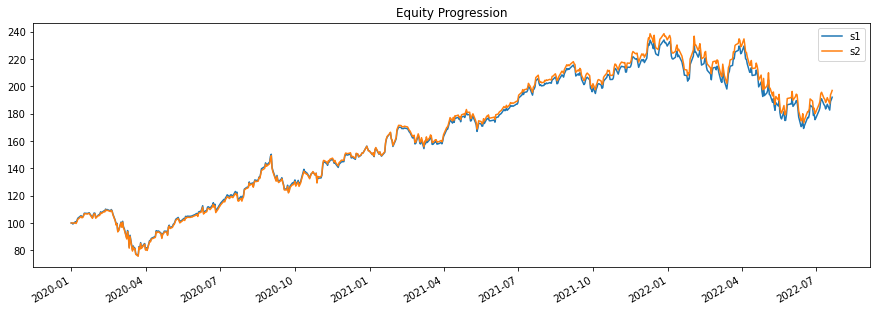

In [39]:
# testing it with the same data set abd compare it with first backtest.
test2 = bt.Backtest(s2, data)
# we include test here to see the results side-by-side
res2 = bt.run(test, test2)

res2.plot();

In [40]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2020-01-01  2020-01-01
End                  2022-07-21  2022-07-21
Risk-free rate       0.00%       0.00%

Total Return         91.99%      96.95%
Daily Sharpe         0.95        0.98
Daily Sortino        1.53        1.58
CAGR                 29.13%      30.42%
Max Drawdown         -30.92%     -30.89%
Calmar Ratio         0.94        0.98

MTD                  9.35%       9.44%
3m                   -7.14%      -7.07%
6m                   -7.74%      -7.18%
YTD                  -16.30%     -15.80%
1Y                   -3.03%      -1.58%
3Y (ann.)            29.13%      30.42%
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  29.13%      30.42%

Daily Sharpe         0.95        0.98
Daily Sortino        1.53        1.58
Daily Mean (ann.)    30.87%      31.82%
Daily Vol (ann.)     32.51%      32.35%
Daily Skew           -0.25       -0.25
Daily Kurt